In [1]:
!pip install control numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 8.5 MB/s eta 0:00:00


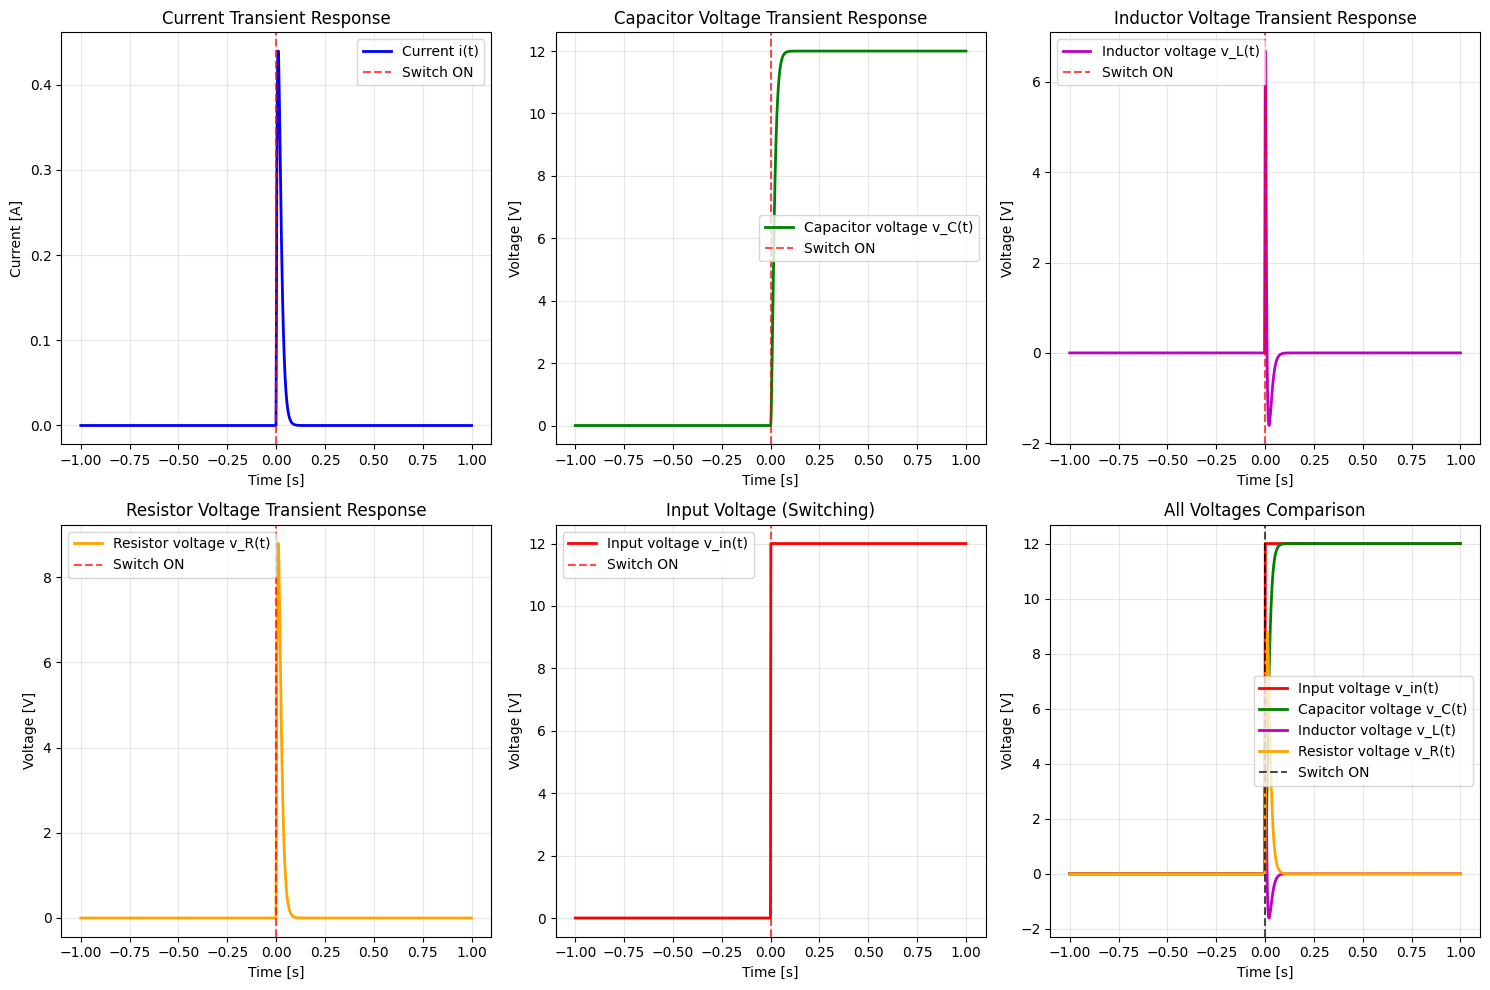

=== RLC Circuit Characteristics ===
R = 20.0 Ω
L = 0.1 H
C = 0.001 F
V_source = 12.0 V

Natural angular frequency ω₀ = 100.00 rad/s
Damping ratio ζ = 1.000
Critically damped

Steady state:
Final current = 0 A (capacitor fully charged)
Final capacitor voltage = 12.0 V


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 回路パラメータ
R = 20.0    # 抵抗 [Ω] (より大きな減衰のため増加)
L = 0.1     # インダクタンス [H]
C = 1e-3    # キャパシタンス [F]
V_source = 12.0  # 電圧源 [V]

# パラメータ選択の指針:
# - 臨界減衰: R = 2√(L/C) = 2√(0.1/0.001) = 20Ω
# - 適度な減衰振動: R = 6-12Ω程度
# - 強い振動: R = 2-5Ω程度

# 時間設定
t_start = -1.0  # 開始時刻 [s]
t_switch = 0.0  # スイッチオン時刻 [s]
t_end = 1.0     # 終了時刻 [s]

def rlc_circuit(t, y):
    """
    RLC回路の微分方程式
    y[0] = i(t): 電流
    y[1] = v_C(t): コンデンサ電圧
    """
    i, v_C = y

    # スイッチの状態（t >= 0でオン）
    if t >= t_switch:
        v_in = V_source
    else:
        v_in = 0.0

    # キルヒホッフの法則による微分方程式
    # L * di/dt + R * i + v_C = v_in
    # C * dv_C/dt = i

    di_dt = (v_in - R * i - v_C) / L
    dv_C_dt = i / C

    return [di_dt, dv_C_dt]

# 初期条件（t < 0では電流もコンデンサ電圧も0）
y0 = [0.0, 0.0]  # [i(0), v_C(0)]

# 時間配列
t_span = (t_start, t_end)
t_eval = np.linspace(t_start, t_end, 1000)

# 微分方程式を解く
sol = solve_ivp(rlc_circuit, t_span, y0, t_eval=t_eval, dense_output=True)

# 結果の取得
t = sol.t
i = sol.y[0]  # 電流
v_C = sol.y[1]  # コンデンサ電圧

# インダクタ電圧とスイッチ電圧の計算
v_L = L * np.gradient(i, t)  # インダクタ電圧
v_R = R * i  # 抵抗電圧

# 入力電圧（スイッチによる）
v_in = np.where(t >= t_switch, V_source, 0.0)

# グラフの作成
plt.figure(figsize=(15, 10))

# Current plot
plt.subplot(2, 3, 1)
plt.plot(t, i, 'b-', linewidth=2, label='Current i(t)')
plt.axvline(x=t_switch, color='r', linestyle='--', alpha=0.7, label='Switch ON')
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.title('Current Transient Response')
plt.grid(True, alpha=0.3)
plt.legend()

# Capacitor voltage plot
plt.subplot(2, 3, 2)
plt.plot(t, v_C, 'g-', linewidth=2, label='Capacitor voltage v_C(t)')
plt.axvline(x=t_switch, color='r', linestyle='--', alpha=0.7, label='Switch ON')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Capacitor Voltage Transient Response')
plt.grid(True, alpha=0.3)
plt.legend()

# Inductor voltage plot
plt.subplot(2, 3, 3)
plt.plot(t, v_L, 'm-', linewidth=2, label='Inductor voltage v_L(t)')
plt.axvline(x=t_switch, color='r', linestyle='--', alpha=0.7, label='Switch ON')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Inductor Voltage Transient Response')
plt.grid(True, alpha=0.3)
plt.legend()

# Resistor voltage plot
plt.subplot(2, 3, 4)
plt.plot(t, v_R, 'orange', linewidth=2, label='Resistor voltage v_R(t)')
plt.axvline(x=t_switch, color='r', linestyle='--', alpha=0.7, label='Switch ON')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Resistor Voltage Transient Response')
plt.grid(True, alpha=0.3)
plt.legend()

# Input voltage plot
plt.subplot(2, 3, 5)
plt.plot(t, v_in, 'r-', linewidth=2, label='Input voltage v_in(t)')
plt.axvline(x=t_switch, color='r', linestyle='--', alpha=0.7, label='Switch ON')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Input Voltage (Switching)')
plt.grid(True, alpha=0.3)
plt.legend()

# All voltages comparison plot
plt.subplot(2, 3, 6)
plt.plot(t, v_in, 'r-', linewidth=2, label='Input voltage v_in(t)')
plt.plot(t, v_C, 'g-', linewidth=2, label='Capacitor voltage v_C(t)')
plt.plot(t, v_L, 'm-', linewidth=2, label='Inductor voltage v_L(t)')
plt.plot(t, v_R, 'orange', linewidth=2, label='Resistor voltage v_R(t)')
plt.axvline(x=t_switch, color='k', linestyle='--', alpha=0.7, label='Switch ON')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('All Voltages Comparison')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# 回路特性の計算と表示
omega_0 = 1 / np.sqrt(L * C)  # 固有角周波数
zeta = R / (2 * np.sqrt(L / C))  # 減衰係数
omega_d = omega_0 * np.sqrt(1 - zeta**2) if zeta < 1 else 0  # 減衰振動角周波数

print("=== RLC Circuit Characteristics ===")
print(f"R = {R} Ω")
print(f"L = {L} H")
print(f"C = {C} F")
print(f"V_source = {V_source} V")
print(f"\nNatural angular frequency ω₀ = {omega_0:.2f} rad/s")
print(f"Damping ratio ζ = {zeta:.3f}")

if zeta > 1:
    print("Over-damped")
elif zeta == 1:
    print("Critically damped")
else:
    print("Under-damped")
    print(f"Damped angular frequency ωd = {omega_d:.2f} rad/s")
    print(f"Damped oscillation period Td = {2*np.pi/omega_d:.3f} s")

# Steady-state values
print(f"\nSteady state:")
print(f"Final current = 0 A (capacitor fully charged)")
print(f"Final capacitor voltage = {V_source} V")